# HOUSING PRICES prediction

In [1]:
from IPython.display import Image
Image(url= "https://www.vancouverrealestatepodcast.com/wp-content/uploads/2018/10/Detached-home-prices.jpg")

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df = pd.read_csv('/home/aman/Downloads/house-prices-advanced-regression-techniques/train.csv')
#df.describe()
#df.info()
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pip install folium

     |████████████████████████████████| 102kB 252kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Defing afunction and calculate the R 2

The R-squared increases when the number of features increase. Because of this, sometimes a more robust evaluator is preferred to compare the performance between different models. This evaluater is called adjusted R-squared and it only increases, if the addition of the variable reduces the MSE. The definition of the adjusted  R2 

In [3]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

when we model linear relation ship with only one feature and use the value

In [6]:
train_data,test_data=train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['LotArea'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['SalePrice'], dtype=pd.Series)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
X_test=np.array(test_data['LotArea'],dtype=pd.Series).reshape(-1,1)
y_test=np.array(test_data["SalePrice"],dtype=pd.Series)

In [18]:
pred=lr.predict(X_test)

In [23]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['LotArea']],df['SalePrice'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation


Average Price for Test Data: 178248.863
Intercept: 157358.51412700646
Coefficient: [2.28893843]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,69646.091,0.078,-,0.018,-,0.037


In [24]:
sns.set(style="white",font_scale=1)

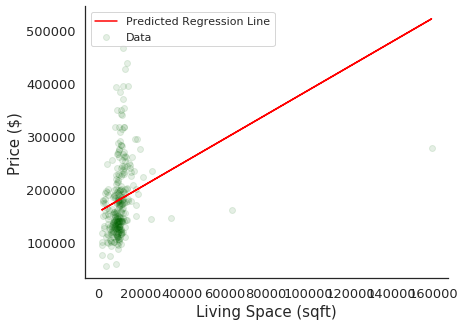

In [25]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Visualize and Examine the Data

In [30]:
test=pd.read_csv("/home/aman/Downloads/house-prices-advanced-regression-techniques/test.csv")
train=pd.read_csv("/home/aman/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [31]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# 1. Analyzing Data

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [33]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [36]:
train.shape

(1460, 81)

In [37]:
test.shape

(1459, 80)

## 2. Feature Engineering : 

In [38]:
train_data_set=[train,test]

### 2.1 MSZoning_mapping

In [39]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [40]:
MSZoning_mapping={'RL': 0,
                 'RM': 1,
                 'FV': 2,
                 'RH': 3,
                 'C': 4}

In [41]:
MSZoning_mapping

{'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C': 4}

In [42]:
for dataset in train_data_set:
    dataset['MSZoning']=dataset['MSZoning'].map(MSZoning_mapping)

In [43]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.0,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,0.0,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,0.0,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,0.0,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,0.0,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,1.0,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,0.0,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,0.0,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 2.2 Street Mapping:

In [44]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [45]:
street_mapping={'Pave': 0, 'Grvl':1}

In [46]:
for dataset in train_data_set:
    dataset['Street']=dataset['Street'].map(street_mapping)

## 2.3 Alley mapping:

In [47]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [48]:
alley_mapping={'Grvl': 0,'Pave':1}

In [49]:
for dataset in train_data_set:
    dataset['Alley']=dataset['Alley'].map(alley_mapping)

In [50]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.0,80.0,11622,0,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,0.0,81.0,14267,0,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,0.0,74.0,13830,0,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,0.0,78.0,9978,0,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,0.0,43.0,5005,0,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,0,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,1.0,21.0,1894,0,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,0.0,160.0,20000,0,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,0.0,62.0,10441,0,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [51]:
train["Alley"].fillna(train.groupby("MSSubClass")["Alley"].transform("median"), inplace=True)
test["Alley"].fillna(test.groupby("MSSubClass")["Alley"].transform("median"), inplace=True)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1440 non-null float64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1449 non-null float64
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 no

In [53]:
train['LotFrontage']=train['LotFrontage']/max(train['LotFrontage'])

In [54]:
test['LotFrontage']=test['LotFrontage']/max(test['LotFrontage'])

In [55]:
train['MSSubClass']=train['MSSubClass']/max(train['MSSubClass'])
test['MSSubClass']=test['MSSubClass']/max(test['MSSubClass'])

(0, 215245.0)

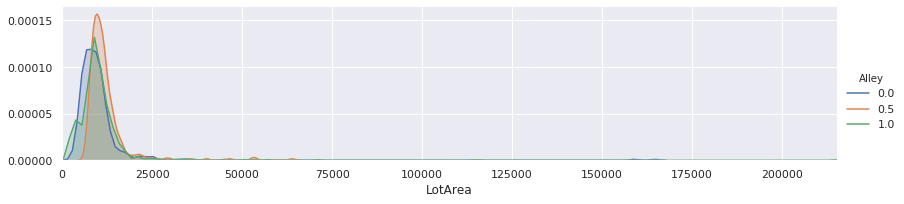

In [56]:
facet = sns.FacetGrid(train, hue="Alley",aspect=4)
facet.map(sns.kdeplot,'LotArea',shade= True)
facet.set(xlim=(0, train['LotArea'].max()))
facet.add_legend()
plt.xlim(0)

(0, 755000.0)

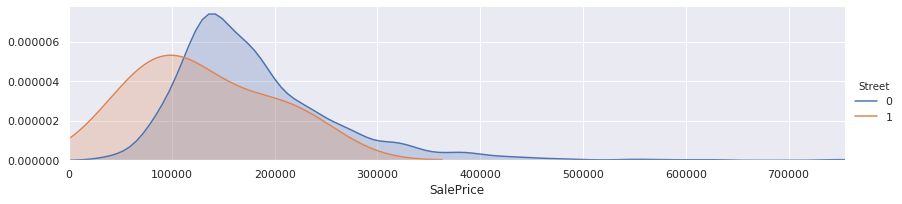

In [57]:
facet = sns.FacetGrid(train, hue="Street",aspect=4)
facet.map(sns.kdeplot,'SalePrice',shade= True)
facet.set(xlim=(0, train['SalePrice'].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.315789,0.0,0.207668,8450,0,0.5,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,0.105263,0.0,0.255591,9600,0,1.0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,0.315789,0.0,0.217252,11250,0,0.5,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0.368421,0.0,0.191693,9550,0,0.0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,0.315789,0.0,0.268371,14260,0,0.5,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.315789,0.0,0.198083,7917,0,0.5,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,0.105263,0.0,0.271565,13175,0,1.0,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,0.368421,0.0,0.210863,9042,0,0.0,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,0.105263,0.0,0.217252,9717,0,1.0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 2.4 LotShape Mapping...

In [59]:
train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [60]:
lot_shape_mapping={'Reg': 0,
                  'IR1':1,
                  'IR2':2,
                  'IR3':3}

In [61]:
for dataset in train_data_set:
    dataset['LotShape']=dataset['LotShape'].map(lot_shape_mapping)

## 2.LandContour

In [62]:
train['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [63]:
LContour_mapping={'Lvl':0,
                 'Bnk':1,
                 'HLS':2,
                 'Low':3}

In [64]:
for dataset in train_data_set:
    dataset['LandContour']=dataset['LandContour'].map(LContour_mapping)


## 5.Utilities

In [65]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [66]:
utility_mapping={'AllPub':0,
                'NoSeWa':1}

In [67]:
for dataset in train_data_set:
    dataset['Utilities']=dataset['Utilities'].map(utility_mapping)

In [68]:
train["Utilities"].fillna(train.groupby("Alley")["Utilities"].transform("median"), inplace=True)
test["Utilities"].fillna(test.groupby("Alley")["Utilities"].transform("median"), inplace=True)

In [69]:
dataset[1:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,1462,0.105263,0.0,0.405,14267,0,0.0,1,0,0.0,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,0.315789,0.0,0.370,13830,0,0.5,1,0,0.0,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,0.315789,0.0,0.390,9978,0,0.5,1,0,0.0,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,0.631579,0.0,0.215,5005,0,1.0,1,2,0.0,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,0.315789,0.0,0.375,10000,0,0.5,1,0,0.0,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,0.105263,0.0,NaN,7980,0,0.0,1,0,0.0,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,0.315789,0.0,0.315,8402,0,0.5,1,0,0.0,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,0.105263,0.0,0.425,10176,0,0.0,0,0,0.0,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,0.105263,0.0,0.350,8400,0,0.0,0,0,0.0,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


## 4.LotConfig 

In [70]:
train['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [71]:
Lconfig_mapping={'Inside':0,
                'Cornor':1,
                'CulDSac':2,
                'FR2':3,
                'FR3':4}

In [72]:
for dataset in train_data_set:
    dataset['LotConfig']=dataset['LotConfig'].map(Lconfig_mapping)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null float64
MSZoning         1440 non-null float64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1449 non-null float64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null float64
LotConfig        1211 non-null float64
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 

In [74]:
dataset['Alley']

0       0.0
1       0.0
2       0.5
3       0.5
4       1.0
       ... 
1454    1.0
1455    1.0
1456    0.0
1457    0.0
1458    0.5
Name: Alley, Length: 1459, dtype: float64

# Sales condition

In [77]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [78]:
SlaesType_mapping={
    "WD":1,
    "New":2,
    "COD":3,
    "ConLD":4,
    "ConLw":5,
    "ConLI":6,
    "CWD":7,
    "0th":8,
    "Con":9
}

In [80]:
for dataset in train_data_set:
    dataset['SaleType']=dataset['SaleType'].map(SlaesType_mapping)

In [81]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.315789,0.0,0.207668,8450,0,0.5,0,0,0,...,0,NaN,NaN,NaN,0,2,2008,NaN,Normal,208500
1,2,0.105263,0.0,0.255591,9600,0,1.0,0,0,0,...,0,NaN,NaN,NaN,0,5,2007,NaN,Normal,181500
2,3,0.315789,0.0,0.217252,11250,0,0.5,1,0,0,...,0,NaN,NaN,NaN,0,9,2008,NaN,Normal,223500
3,4,0.368421,0.0,0.191693,9550,0,0.0,1,0,0,...,0,NaN,NaN,NaN,0,2,2006,NaN,Abnorml,140000
4,5,0.315789,0.0,0.268371,14260,0,0.5,1,0,0,...,0,NaN,NaN,NaN,0,12,2008,NaN,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.315789,0.0,0.198083,7917,0,0.5,0,0,0,...,0,NaN,NaN,NaN,0,8,2007,NaN,Normal,175000
1456,1457,0.105263,0.0,0.271565,13175,0,1.0,0,0,0,...,0,NaN,MnPrv,NaN,0,2,2010,NaN,Normal,210000
1457,1458,0.368421,0.0,0.210863,9042,0,0.0,0,0,0,...,0,NaN,GdPrv,Shed,2500,5,2010,NaN,Normal,266500
1458,1459,0.105263,0.0,0.217252,9717,0,1.0,0,0,0,...,0,NaN,NaN,NaN,0,4,2010,NaN,Normal,142125
